<div class="alert alert-success">
<b>Reviewer's comment V3</b>

The project is now accepted! Good luck on the next sprint!
    
</div>

**Sprint 9**

Course Project

By Miguel Polanco

## **Project description**

You work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location:



* Collect the oil well parameters in the selected region: oil quality and volume of reserves;
* Build a model for predicting the volume of reserves in the new wells;
* Pick the oil wells with the highest estimated values;
* Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the **Bootstrapping** technique.


## **Project instructions**



1. Download and prepare the data. Explain the procedure.
2. Train and test the model for each region: \
 2.1. Split the data into a training set and validation set at a ratio of 75:25. \
 2.2. Train the model and make predictions for the validation set. \
 2.3. Save the predictions and correct answers for the validation set. \
 2.4. Print the average volume of predicted reserves and model _RMSE. \
 2.5. Analyze the results.
3. Prepare for profit calculation: \
 3.1. Store all key values for calculations in separate variables. \
 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region. \
 3.3. Provide the findings about the preparation for profit calculation step.
4. Write a function to calculate profit from a set of selected oil wells and model predictions: \
 4.1. Pick the wells with the highest values of predictions. \
 4.2. Summarize the target volume of reserves in accordance with these predictions \
 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.
5. Calculate risks and profit for each region: \
 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit. \
 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage. \
 5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

### Download and prepare the data. Explain the procedure.

#### Import libraires

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import bootstrap

In [2]:
urls_geo_0 = 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_0.csv'
urls_geo_1 = 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_1.csv'
urls_geo_2 = 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_2.csv'


#### Import datasetd

Load the datasets, display first five rows, display summary information for each datafrane, check duplicates for all rows and base in id column, remove duplicates base in id column and check the dataframe again.

In [3]:
geo_0 =  pd.read_csv(urls_geo_0)

In [4]:
display("Show first 5th rows of data set:",geo_0[:5])
# The info function in Pandas is displays a summary of the dataframe. It displays column names, data types, the number of non-null values, and memory usage.
print('Summary of the dataframe.: \n')
print(geo_0.info())
print('Count the rows duplicates in the dataframe: \n',geo_0.duplicated().sum())
print('Count the rows duplicates in \'id\'s coloumn: \n',geo_0.duplicated(subset=['id']).sum())

'Show first 5th rows of data set:'

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Summary of the dataframe.: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Count the rows duplicates in the dataframe: 
 0
Count the rows duplicates in 'id's coloumn: 
 10


In [5]:
print(geo_0[geo_0.duplicated(subset=['id'], keep=False) == True].sort_values('id'))

          id        f0        f1         f2     product
66136  74z30  1.084962 -0.312358   6.990771  127.643327
64022  74z30  0.741456  0.459229   5.153109  140.771492
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
3389   A5aEY -0.039949  0.156872   0.209861   89.249364
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
42529  AGS9W  1.454747 -0.479651   0.683380  126.370504
931    HZww2  0.755284  0.368511   1.863211   30.681774
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
1949   QcMuo  0.506563 -0.323775  -2.215583   75.496502
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
21426  Tdehs  0.829407  0.298807  -0.049563   96.035308
92341  TtcGQ  0.110711  1.022689   0.911381  101.318008
60140  TtcGQ  0.569276 -0.104876   6.440215   85.350186
89582  bsk9y  0.398908 -0.400253  10.122376  163.433078
97785  bsk9y  0.378429  0.005837   0.160827  160.637302
41724  bxg6G -0.823752  0.546319   3.630479   93

In [6]:
geo_0 = geo_0.drop_duplicates(subset=['id'], keep=False)


In [7]:
display(geo_0[:5])
geo_0.info()
print('Count the rows duplicates in \'id\'s coloumn: \n',geo_0.duplicated(subset=['id']).sum())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99980 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99980 non-null  object 
 1   f0       99980 non-null  float64
 2   f1       99980 non-null  float64
 3   f2       99980 non-null  float64
 4   product  99980 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
Count the rows duplicates in 'id's coloumn: 
 0


In [9]:
display(geo_0[:5])
geo_0.info()
print('Count the rows duplicates in \'id\'s coloumn: \n',geo_0.duplicated(subset=['id']).sum())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99980 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99980 non-null  object 
 1   f0       99980 non-null  float64
 2   f1       99980 non-null  float64
 3   f2       99980 non-null  float64
 4   product  99980 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
Count the rows duplicates in 'id's coloumn: 
 0


In [10]:
geo_1 =  pd.read_csv(urls_geo_1)

In [11]:
display("Show first 5th rows of data set:",geo_1[:5])
# The info function in Pandas is displays a summary of the dataframe. It displays column names, data types, the number of non-null values, and memory usage.
print('Summary of the dataframe.: \n')
print(geo_1.info())
print('Count the rows duplicates in the dataframe: \n',geo_1.duplicated().sum())
print('Count the rows duplicates in \'id\'s coloumn: \n',geo_1.duplicated(subset=['id']).sum())

'Show first 5th rows of data set:'

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Summary of the dataframe.: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Count the rows duplicates in the dataframe: 
 0
Count the rows duplicates in 'id's coloumn: 
 4


In [12]:
print(geo_1[geo_1.duplicated(subset=['id'], keep=False) == True].sort_values('id'))

          id         f0         f1        f2     product
5849   5ltQ6  -3.435401 -12.296043  1.999796   57.085625
84461  5ltQ6  18.213839   2.191999  3.993869  107.813044
1305   LHZR0  11.170835  -1.945066  3.002872   80.859783
41906  LHZR0  -8.989672  -4.286607  2.009139   57.085625
2721   bfPNe  -9.494442  -5.463692  4.006042  110.992147
82178  bfPNe  -6.202799  -4.820045  2.995107   84.038886
47591  wt4Uk  -9.091098  -8.109279 -0.002314    3.179103
82873  wt4Uk  10.259972  -9.376355  4.994297  134.766305


In [13]:
geo_1 = geo_1.drop_duplicates(subset=['id'], keep=False)

In [14]:
#encoder1 = OrdinalEncoder()
#geo_1 = pd.DataFrame(encoder1.fit_transform(geo_1), columns=geo_1.columns)

In [15]:
display(geo_1[:5])
geo_1.info()
print('Count the rows duplicates in \'id\'s coloumn: \n',geo_1.duplicated(subset=['id']).sum())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f2       99992 non-null  float64
 4   product  99992 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
Count the rows duplicates in 'id's coloumn: 
 0


In [16]:
geo_2 =  pd.read_csv(urls_geo_2)

In [17]:
display("Show first 5th rows of data set:",geo_2[:5])
# The info function in Pandas is displays a summary of the dataframe. It displays column names, data types, the number of non-null values, and memory usage.
print('Summary of the dataframe.: \n')
print(geo_2.info())
print('Count the rows duplicates in the dataframe: \n',geo_2.duplicated().sum())
print('Count the rows duplicates in \'id\'s coloumn: \n',geo_2.duplicated(subset=['id']).sum())

'Show first 5th rows of data set:'

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Summary of the dataframe.: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Count the rows duplicates in the dataframe: 
 0
Count the rows duplicates in 'id's coloumn: 
 4


In [18]:
print(geo_2[geo_2.duplicated(subset=['id'], keep=False) == True].sort_values('id'))

          id        f0        f1        f2     product
45404  KUPhW  0.231846 -1.698941  4.990775   11.716299
55967  KUPhW  1.211150  3.176408  5.543540  132.831802
11449  VF7Jo  2.122656 -0.858275  5.746001  181.716817
49564  VF7Jo -0.883115  0.560537  0.723601  136.233420
44378  Vcm5J -1.229484 -2.439204  1.222909  137.968290
95090  Vcm5J  2.587702  1.986875  2.482245   92.327572
28039  xCHr8  1.633027  0.368135 -2.378367    6.120525
43233  xCHr8 -0.847066  2.101796  5.597130  184.388641


In [19]:
geo_2 = geo_2.drop_duplicates(subset=['id'], keep=False)

In [20]:
#encoder2 = OrdinalEncoder()
#geo_2 = pd.DataFrame(encoder2.fit_transform(geo_2), columns=geo_2.columns)

In [21]:
display(geo_2[:5])
geo_2.info()
print('Count the rows duplicates in \'id\'s coloumn: \n',geo_2.duplicated(subset=['id']).sum())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f2       99992 non-null  float64
 4   product  99992 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
Count the rows duplicates in 'id's coloumn: 
 0


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected

</div>

### Train and test the model for each region:

merge on list the dataframe

In [22]:
data = [geo_0,geo_1,geo_2]

In [23]:
region_averages = []
region_rmse = []
targets_valid = []
predictions_list = []

for i, region in enumerate(data):
    # 2.1. Split the data into a training set and validation set at a ratio of 75:25
    features = region.drop(['id', 'product'], axis=1)
    target = region['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

    # # 2.2. Train the model and make predictions for the validation set
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)

    # 2.3. Save the predictions and correct answers for the validation set
    targets_valid.append(target_valid)
    predictions_list.append(pd.Series(predictions, index=target_valid.index))

    # 2.4. Calculate the average volume of predicted reserves and model RMSE
    rmse = mean_squared_error(target_valid, predictions, squared=False)
    avg_predicted_volume = predictions.mean()

    # Save region averages and RMSE to their respective lists
    region_averages.append(avg_predicted_volume)
    region_rmse.append(rmse)

    print(f"Region {i}: Average predicted volume: {avg_predicted_volume:15.4f}, RMSE: {rmse:15.4f}")


Region 0: Average predicted volume:         92.4238, RMSE:         37.7169
Region 1: Average predicted volume:         68.9831, RMSE:          0.8915
Region 2: Average predicted volume:         95.1162, RMSE:         39.9755


This code will save the predictions and correct answers to two list variables\
 region_averages and region_rmse, respectively. You can then load these files later to evaluate the model's
 performance.

2.5. Analyze the results.

RMSE of region 1 is lower value indicate the better prediction.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data for each region was split into train and validation sets, the models were trained and evaluated correctly

</div>

### Prepare for profit calculation:
 3.1. Store all key values for calculations in separate variables. \
 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region. \
 3.3. Provide the findings about the preparation for profit calculation step.

In [24]:
# 3.1. Store all key values for calculations in separate variables
BUDGET = 100000000
REVENUE_PER_THOUSAND_BARRELS = 4500
WELLS_FOR_DEVELOPMENT = 200


3.2. Calculate the volume of reserves sufficient for developing a new well without losses

In [25]:
break_even_volume = BUDGET / (WELLS_FOR_DEVELOPMENT * REVENUE_PER_THOUSAND_BARRELS)
print("Break-even volume (thousand barrels):", break_even_volume)

Break-even volume (thousand barrels): 111.11111111111111


<div class="alert alert-success">
<b>Reviewer's comment</b>

Calculation is correct!

</div>

3.3. Provide the findings about the preparation for profit calculation step.

In [26]:
# 3.3. Provide the findings about the preparation for profit calculation step
# Summarize the findings
print("Break-even volume (thousand barrels):", break_even_volume)

for i, avg in enumerate(region_averages):
    print(f"Region {i}:")
    print(f"  Average predicted volume (thousand barrels): {avg:.2f}")
    difference = avg - break_even_volume
    if difference >= 0:
        print(f"  The average predicted volume in Region {i} is {abs(difference):.2f} thousand barrels above the break-even volume.")
    else:
        print(f"  The average predicted volume in Region {i} is {abs(difference):.2f} thousand barrels below the break-even volume.")


Break-even volume (thousand barrels): 111.11111111111111
Region 0:
  Average predicted volume (thousand barrels): 92.42
  The average predicted volume in Region 0 is 18.69 thousand barrels below the break-even volume.
Region 1:
  Average predicted volume (thousand barrels): 68.98
  The average predicted volume in Region 1 is 42.13 thousand barrels below the break-even volume.
Region 2:
  Average predicted volume (thousand barrels): 95.12
  The average predicted volume in Region 2 is 15.99 thousand barrels below the break-even volume.


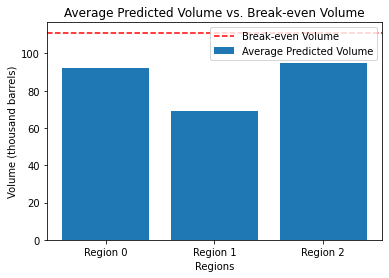

In [27]:
import matplotlib.pyplot as plt

regions = ['Region 0', 'Region 1', 'Region 2']
plt.bar(regions, region_averages, label='Average Predicted Volume')
plt.axhline(y=break_even_volume, color='r', linestyle='--', label='Break-even Volume')

plt.xlabel('Regions')
plt.ylabel('Volume (thousand barrels)')
plt.title('Average Predicted Volume vs. Break-even Volume')
plt.legend()
plt.show()

The chart above illustrates the gap of volume between Break even and average predicted, however the region 1 is 42.13k barrels below, in comparison the region 0 and 2 19k barriels and 16k  barrels, this chart helps to predetermine the region1 is potential region with less possibilities next location.

However, region 2 with 95K barrels is the highest average predicted volume. And close to break-even level.


### Write a function to calculate profit from a set of selected oil wells and model predictions:
 4.1. Pick the wells with the highest values of predictions.\
 4.2. Summarize the target volume of reserves in accordance with these predictions\
 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [28]:
def calculate_profits_for_regions(targets, predictions_list, count):
    profits = {}

    for i, (target, predictions) in enumerate(zip(targets, predictions_list)):
        top_wells = predictions.sort_values(ascending=False).head(count).index
        total_reserves = target.loc[top_wells].sum()
        profit = total_reserves * REVENUE_PER_THOUSAND_BARRELS - BUDGET
        profits[i] = profit

    return profits

def calculate_profit(target, predictions, count):
    
    top_wells = predictions.sort_values(ascending=False).head(count).index
    total_reserves = target.loc[top_wells].sum()
    
    profit = total_reserves * REVENUE_PER_THOUSAND_BARRELS - BUDGET
    
    return profit, total_reserves * REVENUE_PER_THOUSAND_BARRELS # profit and revenue

# Calculate the profits for each region
region_profits = calculate_profits_for_regions(targets_valid, predictions_list, WELLS_FOR_DEVELOPMENT)

# Print the profits for each region
for i, profit in region_profits.items():
    print(f"Region {i}: Profit: {profit:11.2f} USD")
    

Region 0: Profit: 31360260.57 USD
Region 1: Profit: 24150866.97 USD
Region 2: Profit: 24659457.92 USD


<div class="alert alert-success">
<b>Reviewer's comment</b>

The function for profit calculation is correct

</div>

In [29]:
# Find the region with the highest profit
best_region_index = np.argmax(region_profits)
print(f"\nThe region with the highest profit is Region {best_region_index} with a profit of {region_profits[best_region_index]:.2f} USD.")


The region with the highest profit is Region 0 with a profit of 31360260.57 USD.


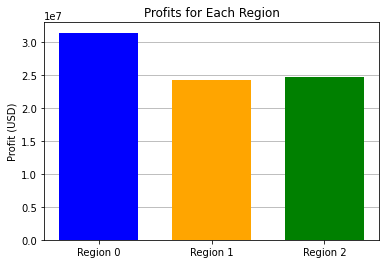

In [30]:

# Set up the figure and axis
fig, ax = plt.subplots()

# Define the x and y values
regions = list(region_profits.keys())
profits = list(region_profits.values())

# Create a bar chart
ax.bar(regions, profits, color=['blue', 'orange', 'green'], width=0.7)

# Customize the chart
ax.set_xticks(regions)
ax.set_xticklabels([f"Region {i}" for i in regions])
ax.set_ylabel('Profit (USD)')
ax.set_title('Profits for Each Region')

ax.grid(axis='y')
xmin, xmax = ax.get_xlim()
ax.set(xlim=(xmin, xmax), axisbelow=True);
# Display the chart
plt.show()

The bar chart above indicated the profit by region, where region 0 is highest then region 1 and 2. This result after applying the code of calculated profit. 

### Calculate risks and profit for each region:
 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.\
 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.\
 5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

In [31]:
def bootstrap_profit(target, predictions, n_samples=1000):
    np.random.seed(12345)
    profit_samples = []
    revenue_samples = []
    for _ in range(n_samples):
        target_subsample = target.sample(n=500, replace=True)
        predictions_subsample = predictions.loc[target_subsample.index]
        
        profit,revenue = calculate_profit(target_subsample, predictions_subsample, WELLS_FOR_DEVELOPMENT)
        profit_samples.append(profit)
        revenue_samples.append(revenue)
    return pd.Series(profit_samples), pd.Series(revenue_samples)


In [32]:
# Perform bootstrapping for each region
bootstrap_profits = []
for target_valid, predictions in zip(targets_valid, predictions_list):
    profit_samples,return_samples = bootstrap_profit(target_valid, predictions)
    bootstrap_profits.append(profit_samples)

In [36]:
def calculate_statistics(profit_samples):
    mean_profit = profit_samples.mean()
    lower = profit_samples.quantile(0.05)
    upper = profit_samples.quantile(0.95)
    
    risk_of_losses = profit_samples[profit_samples<=0].count() / len(profit_samples) * 100
    return mean_profit, lower, upper,risk_of_losses


<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Ok, great!

</div>

In [37]:
# Calculate the required statistics
statistics = []
for profit_samples in bootstrap_profits:
    #print(profit_samples)
    stats = calculate_statistics(profit_samples)
    statistics.append(stats)

region_stats = []
# Print the statistics for each region
for i, (mean_profit, lower, upper,risk_of_losses) in enumerate(statistics):
    region_stat = {
        'mean_profit': mean_profit,
        'lower_ci': lower,
        'upper_ci': upper,
        'risk_of_losses': risk_of_losses
    }
    region_stats.append(region_stat)

    print(f"Region {i}:")
    print(f"  Average profit: {mean_profit:.2f} USD")
    print(f"  95% confidence interval: ({lower:.2f}, {upper:.2f})")
    print(f"  Risk of losses: {risk_of_losses:.2f}%")


Region 0:
  Average profit: 6329210.98 USD
  95% confidence interval: (1402631.22, 11549059.16)
  Risk of losses: 2.00%
Region 1:
  Average profit: 6836507.78 USD
  95% confidence interval: (2550015.61, 11227825.33)
  Risk of losses: 0.70%
Region 2:
  Average profit: 5290364.67 USD
  95% confidence interval: (75557.14, 10464735.77)
  Risk of losses: 4.40%


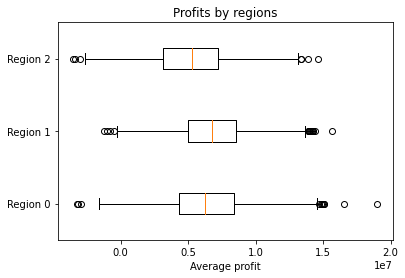

In [60]:
    
plt.boxplot(bootstrap_profits , notch=False, vert=False, labels=['Region 0', 'Region 1', 'Region 2'])
plt.title('Profits by regions')    
plt.xlabel('Average profit')

plt.show()

the boxplot indicate the region 1 is with high median and interquartile range is lower in comparison with other region.

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Nice visualization!

</div>

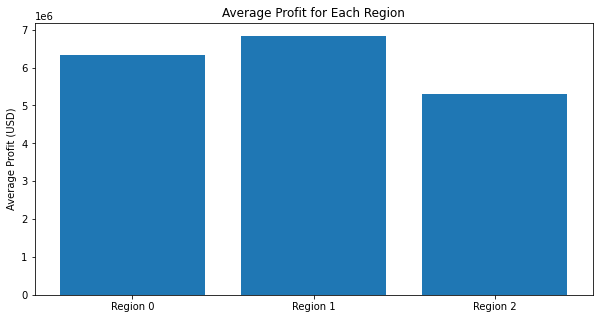

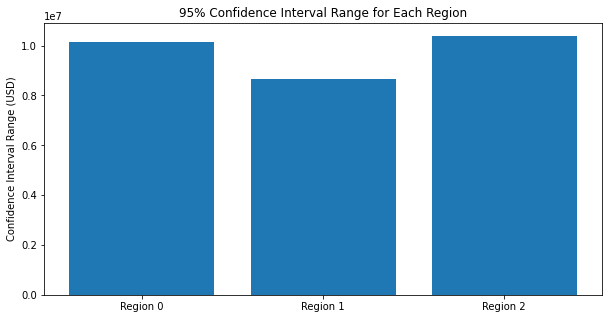

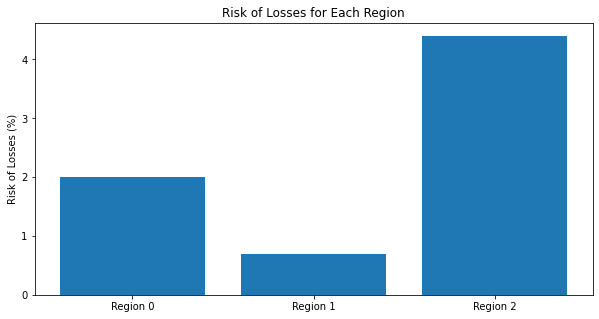

In [38]:
import matplotlib.pyplot as plt

# Set up the data
regions = [0, 1, 2]
average_profits = [stat["mean_profit"] for stat in region_stats]
lower_cis = [stat["lower_ci"] for stat in region_stats]
upper_cis = [stat["upper_ci"] for stat in region_stats]
risk_of_losses = [stat["risk_of_losses"] for stat in region_stats]

# Create a bar chart for average profit
plt.figure(figsize=(10, 5))
plt.bar(regions, average_profits)
plt.xticks(regions, [f"Region {i}" for i in regions])
plt.ylabel("Average Profit (USD)")
plt.title("Average Profit for Each Region")
plt.show()

# Set up the data
regions = [0, 1, 2]
average_profits = [stat["mean_profit"] for stat in region_stats]
confidence_intervals = [(stat["upper_ci"] - stat["lower_ci"]) for stat in region_stats]

# Create a bar chart for confidence intervals
plt.figure(figsize=(10, 5))
plt.bar(regions, confidence_intervals)
plt.xticks(regions, [f"Region {i}" for i in regions])
plt.ylabel("Confidence Interval Range (USD)")
plt.title("95% Confidence Interval Range for Each Region")
plt.show()

# Create a bar chart for risk of losses
plt.figure(figsize=(10, 5))
plt.bar(regions, risk_of_losses)
plt.xticks(regions, [f"Region {i}" for i in regions])
plt.ylabel("Risk of Losses (%)")
plt.title("Risk of Losses for Each Region")
plt.show()

Region 1, gives better profit in comparison with other regions, and confidence interval range is lower. however will be choice region 1 for the next investment will be better profitable. The risk of losses is similar for all regions. Perhaps region1 is greater than other regions.

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Region choice is correct and justified!

</div>